# Welcome !

This may be the first time using Jupyter notebooks, a great tool for reproducible research. In addition to providing a a web application for coding in Python, Julia and R (and beyond), they allow one to directly embed:

 - text (as you may have realized already);
 - figures;
 <img src="MiCM_logo.png" width="400">
 
 - URL links towards e.g. the [Github repository](https://github.com/DylanMannKrzisnik/MiCM_W2021_Jupyter.git) housing the scripts and data needed for this workshop;
 - and so much more, like Youtube videos, PDF documents and - more relevant to this workshop - graphs and plots for visualizing your data and results
 

## Jupyter, an interactive Python command shell (i.e. IPython)

The IPython shell offers users an interactive environment, enabling easy navigation through *directories* and access to data. We can use many of the **BASH** commands which we'd usually run in a Terminal:

<img src="BASH_terminal.png" width="800">

So, rather than listing the content of our directory by executing the *'ls'* BASH command in a Terminal, we can execute *'ls'* directly from a *code cell*:

In [ ]:
#ls

Another BASH terminal command we could try is the *cat* command to display the content of a file:

In [ ]:
#cat README.md

We can also verify the path to our current directory using *pwd*:

In [ ]:
#pwd

Create new (sub)directory "data" and list content of current directory. Note that some BASH commands such as *mkdir* must be preceded by *!*:

In [ ]:
#!mkdir data
#ls

Move EEG data into "data" subdirectory using *mv* and list content of current directory (can use tab completion):

In [ ]:
#mv sub-010321_EC_downsamp.fdt data/
#ls

In [ ]:
#mv *set
#ls

Navigate to "data" using *cd* and display new location with *pwd*. Then, list content of current directory (which is now "data"):

In [ ]:
#cd data/

In [ ]:
#pwd

In [ ]:
#ls

Navigate back to previous directory and verify that now in proper directory:

In [ ]:
#cd ..
#pwd

##Import packages for analysing EEG data

In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

Import EEG data using [MNE Python](https://mne.tools/stable/index.html) analysis package

In [2]:
eeg = mne.io.read_raw_eeglab("sub-010321_EC_downsamp.set")

eeg.annotations.delete( np.arange( len(eeg.annotations.description) ) )  # remove annotations, not important

Reading sub-010321_EC_downsamp.fdt


<ipython-input-2-3833ed384afc>:1: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  eeg = mne.io.read_raw_eeglab("sub-010321_EC_downsamp.set")
<ipython-input-2-3833ed384afc>:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  eeg = mne.io.read_raw_eeglab("sub-010321_EC_downsamp.set")


Our *object* 'eeg' already has built-in functions called *methods*. For example, we can plot the data stored in 'eeg' by calling its *plot* method:

In [ ]:
#eeg.plot()

At this point, our plot is not interactive. We can change the backend of matplotlib to render interactive plots using a *magic command*.

In [3]:
%matplotlib notebook

<IPython.core.display.Javascript object>


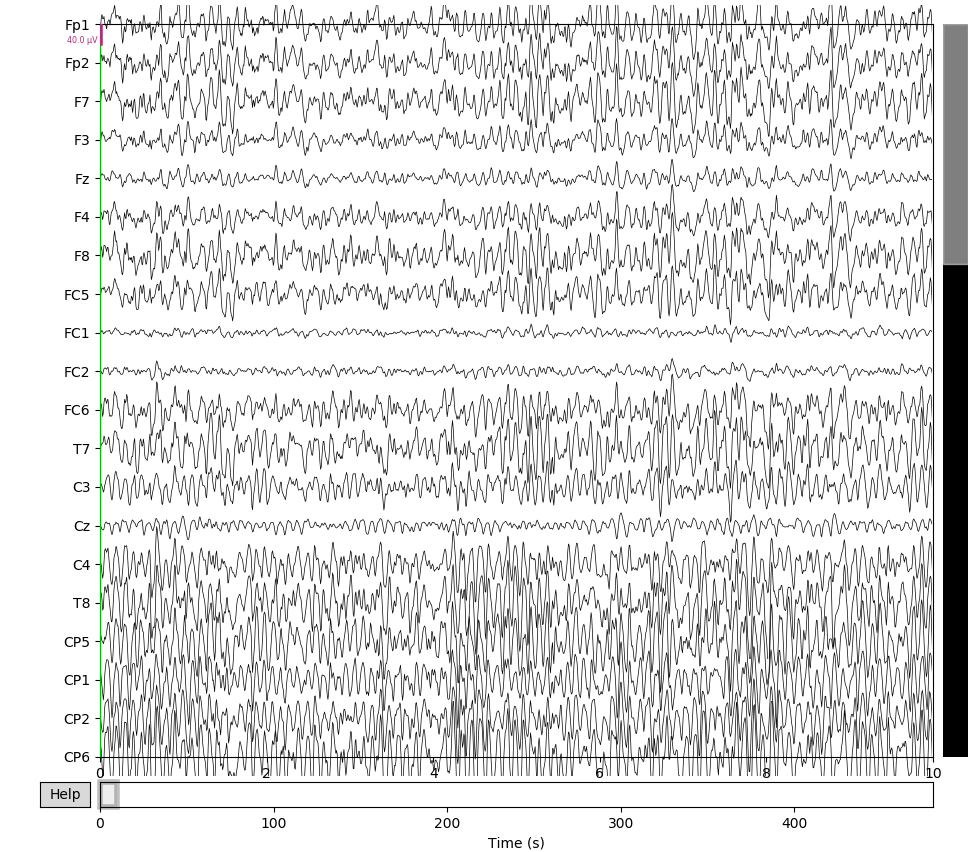

<IPython.core.display.Javascript object>


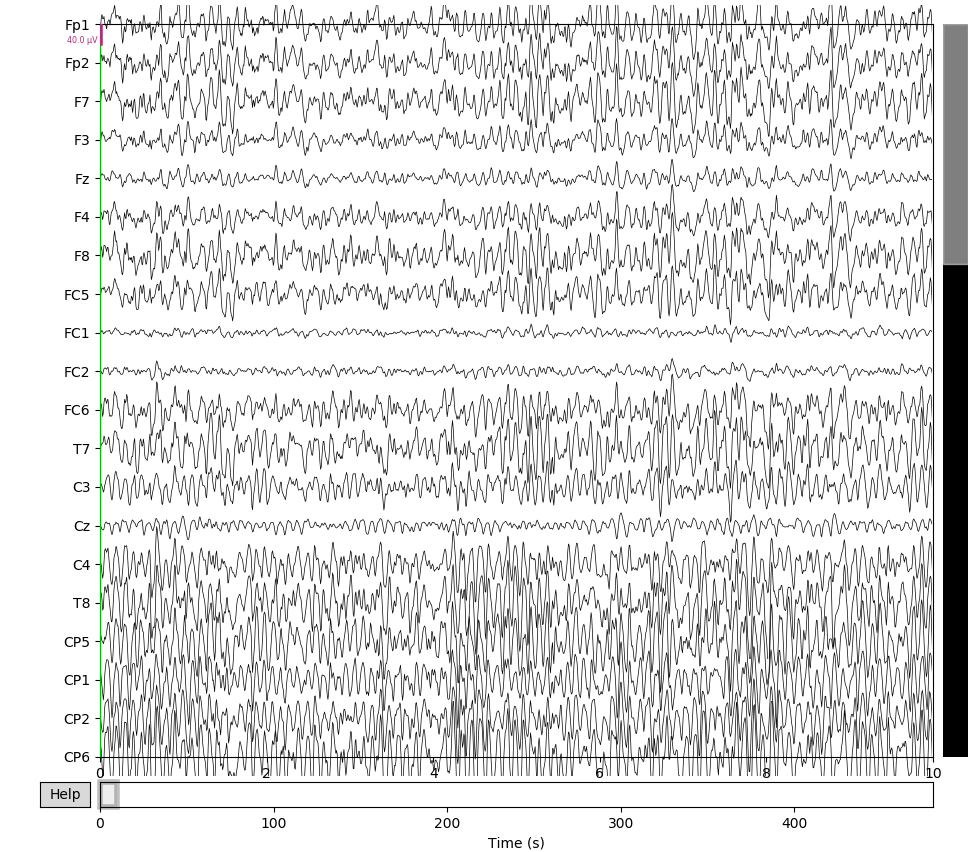

In [5]:
eeg.plot()

In [4]:
from mne.preprocessing import ICA
from sklearn.decomposition import PCA
from mne.decoding import UnsupervisedSpatialFilter
from scipy.stats import zscore
from recombinator.block_bootstrap import circular_block_bootstrap as cbb

In [7]:
ica = ICA(n_components=15, random_state=97)
ica.fit(eeg)

Fitting ICA to data using 61 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 15 components
Fitting ICA took 1.4s.


<ICA | raw data decomposition, fit (fastica): 59988 samples, 15 components, channels used: "eeg">

In [ ]:
ica.plot_sources(eeg)

In [ ]:
ica.plot_components()

In [7]:
eeg_ts = eeg.get_data().T[:,:,np.newaxis]

In [ ]:
print("Original shape: ", eeg.get_data().shape)
print("New shape: ", eeg_ts.shape)

In [8]:
pca = UnsupervisedSpatialFilter(PCA(15), average=False)
pca_data_ts = pca.fit_transform(eeg_ts).squeeze()

In [6]:
num_plots = pca_data_ts.shape[1]
len_plot = 1000

plt.figure(figsize=[9.,9.])
for i in range(num_plots):
    ax = plt.subplot( num_plots , 1, i+1 )
    plt.plot(zscore(pca_data_ts)[:len_plot,i])
    
    ax.set_ylabel("PCA {}".format(i), fontsize=8, rotation=0)
    ax.set_xticks([]); ax.set_yticks([])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
plt.show()
plt.tight_layout()

NameError: name 'pca_data_ts' is not defined

In [ ]:
print(cbb.__doc__)

In [ ]:
print(eeg_ts.shape, eeg_ts_boot.shape)

In [47]:
block_len = 1
num_boots = 250

eeg_ts_boot = cbb(eeg_ts.squeeze(), block_len, num_boots, replace=True).transpose(1,2,0)

<IPython.core.display.Javascript object>


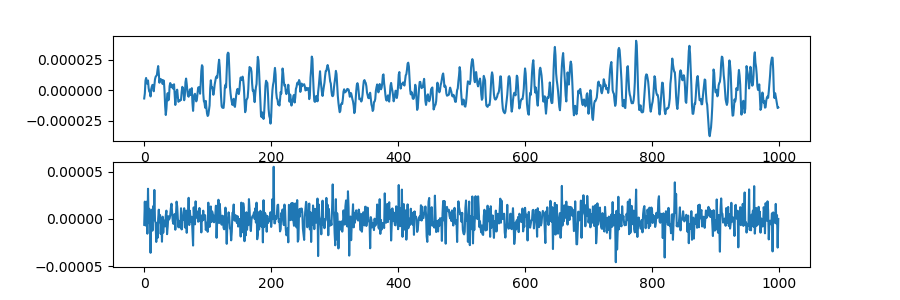

In [11]:
ts = 0
boot = 40

len_plot = 1000

plt.figure(figsize=[9.,3.])
plt.subplot(2,1,1); plt.plot(eeg_ts[:len_plot,ts,0])
plt.subplot(2,1,2); plt.plot(eeg_ts_boot[:len_plot,ts,boot])
plt.show()

In [50]:
eeg_ts_boot.shape

(59988, 61, 50)

In [37]:
idx = np.random.shuffle( np.arange(len(eeg_ts)) )

In [42]:
eeg_ts_boot.shape

(59988, 61, 50)

In [50]:
pca_boot_ts = []
idx = np.arange(61)

for boot in range(num_boots):
    
    np.random.shuffle(idx)

    pca_boot = UnsupervisedSpatialFilter(PCA(30), average=False)    
    pca_boot.fit(eeg_ts_boot[:,:,boot][:,:,np.newaxis])
    pca_boot_ts.append( pca_boot.transform(eeg_ts).squeeze() )
    
pca_boot_ts = np.array(pca_boot_ts).transpose(1,2,0)

<IPython.core.display.Javascript object>


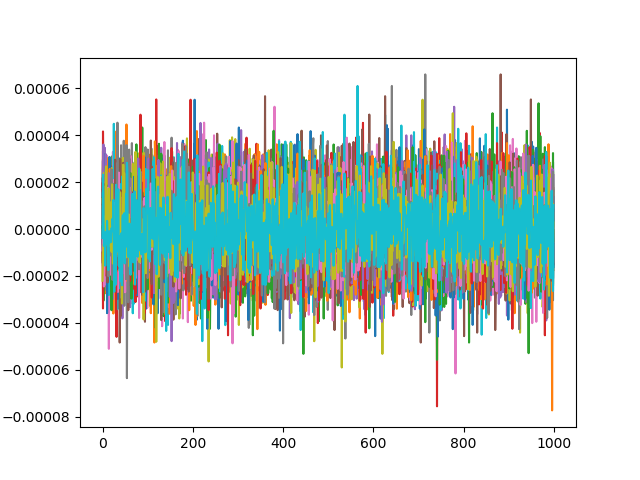

In [44]:
plt.figure()
plt.plot(eeg_ts_boot[:1000,0,:])
plt.show()

<IPython.core.display.Javascript object>


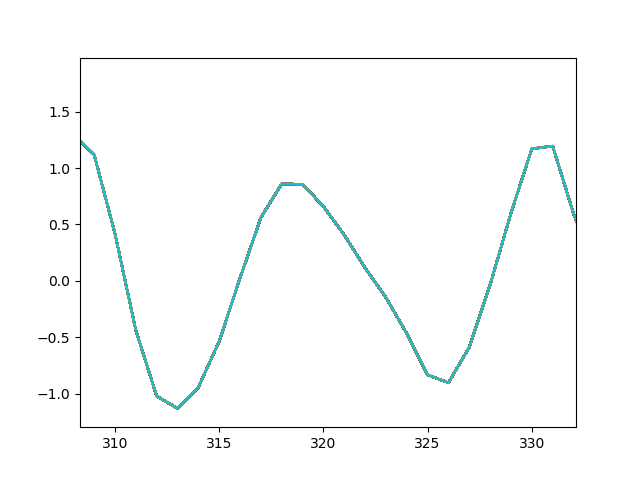

In [51]:
plt.figure()
plt.plot(zscore(pca_boot_ts[1000:2000,0,:]))
plt.show()

In [20]:
pca_boot_ts.shape

(59988, 30)

<IPython.core.display.Javascript object>


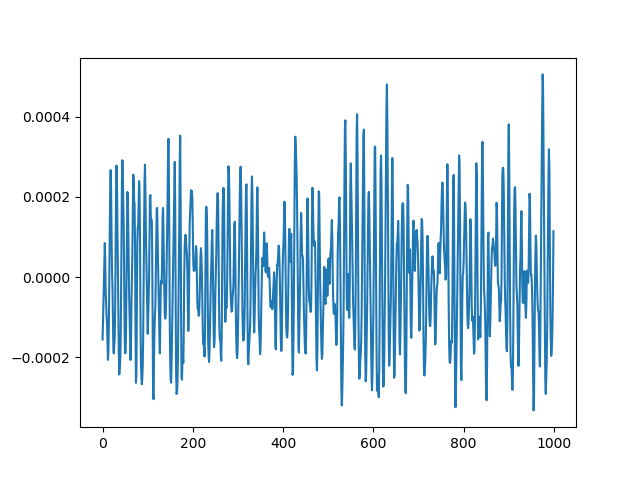

In [24]:
boot=1

pca_boot = UnsupervisedSpatialFilter(PCA(30), average=False)    
pca_boot.fit(eeg_ts_boot[:,:,boot][:,:,np.newaxis])
pca_boot_ts = pca_boot.transform(eeg_ts).squeeze()

plt.figure()
plt.plot(pca_boot_ts[:1000,0])
plt.show()

<IPython.core.display.Javascript object>


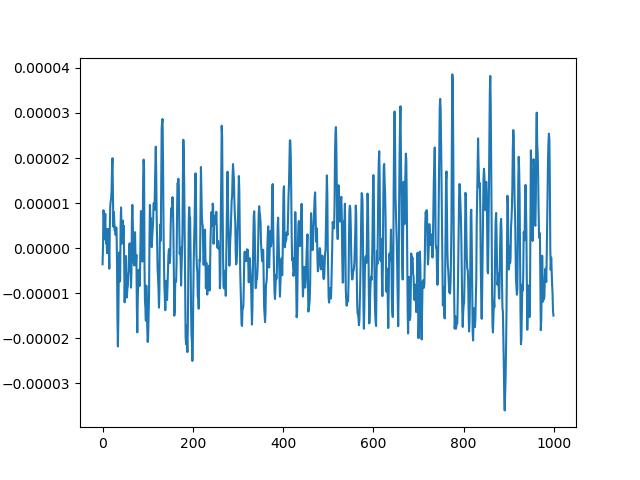

In [26]:
boot=2

pca_boot = UnsupervisedSpatialFilter(PCA(30), average=False)    
pca_boot.fit(eeg_ts_boot[:,:,boot][:,:,np.newaxis])
pca_boot_ts = pca_boot.transform(eeg_ts).squeeze()

plt.figure()
plt.plot(eeg_ts[:1000,1])
plt.show()

In [30]:
pca_boot.__dict__

{'estimator': PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False), 'average': False}

In [52]:
%load_ext watermark

In [54]:
%watermark --iversions
%watermark -p scipy,recombinator,watermark

numpy     : 1.19.5
matplotlib: 3.1.1
mne       : 0.21.dev0

scipy       : 1.4.1
recombinator: 0.0.4
watermark   : 2.2.0

